# PROTOTYPE
### Pulling financial data based on a ticker defined by user

#### First run the imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time

#### Run this cell too please :D

These cells define the functions to pull financial data. You may need to create folders called "Income" and "BalanceSheet" in your directory

In [5]:
def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

# this function pulls Balance Sheet data from StockRow.com
def balance_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=Q&section=Balance%20Sheet&sort=desc'
    response = requests.get(url)
    with open(os.path.join("BalanceSheet", f"{ticker}_balance.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./BalanceSheet/{ticker}_balance.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

# this function pulls Cash Flow statement data from StockRow.com
def cashflow_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Cash%20Flow&sort=desc'
    response = requests.get(url)
    with open(os.path.join("CashFlow", f"{ticker}_cashflow.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./CashFlow/{ticker}_cashflow.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [6]:
stock_list = pd.read_csv('list_of_stocks.csv')

In [7]:
# this function prompts the user for a ticker input
# and calls the income_puller() function to return a DataFrame
# same for balance_puller() to return Balance Sheet info
def ticker_input():
    ticker = input('Please enter a ticker').upper()
    income_df = income_puller(ticker.upper())
    balance_df = balance_puller(ticker.upper())
    cashflow_df = cashflow_puller(ticker.upper())
    return income_df, balance_df, cashflow_df, ticker

#### Please run this cell and enter a ticker; let's see if it works!

In [17]:
# call the function and print charts
income_df,balance_df, cashflow_df, ticker = ticker_input()
ticker.upper()

Please enter a ticker intc


'INTC'

#### Run this cell to see Income Statement data

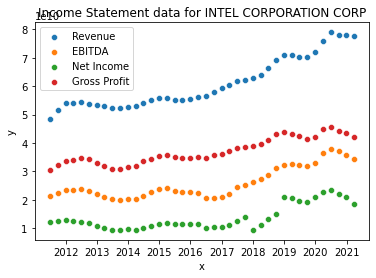

In [18]:
# call the function and print charts

# plot the charts I like most
sns.scatterplot(data=income_df,x=income_df.index,y='Revenue')
sns.scatterplot(data=income_df,x=income_df.index,y='EBITDA')
sns.scatterplot(data=income_df,x=income_df.index,y='Net Income Common')
sns.scatterplot(data=income_df,x=income_df.index,y='Gross Profit').set(xlabel='x',ylabel='y')
plt.legend(labels=['Revenue','EBITDA','Net Income','Gross Profit']);

# this code is optional, 
# it may bounce errors if the ticker isn't in stocks_list 
# try big familiar tickers like JNJ or INTC to calibrate 
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Income Statement data for {ticker_name[6:]}');


#### Run this cell to see Balance Sheet data

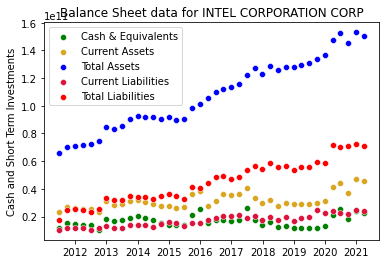

In [19]:
sns.scatterplot(data=balance_df,x=balance_df.index,y="Cash and Short Term Investments", color='green')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current assets", color='goldenrod')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total Assets", color='blue')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current liabilities", color='crimson')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total liabilities",color='red')
plt.legend(labels=['Cash & Equivalents','Current Assets','Total Assets','Current Liabilities','Total Liabilities']);

# this code is optional, 
# it may bounce errors if the ticker isn't in stocks_list 
# try big familiar tickers like JNJ or INTC to calibrate 
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Balance Sheet data for {ticker_name[6:]}');

#### Run this cell to see Cash Flow Statement data

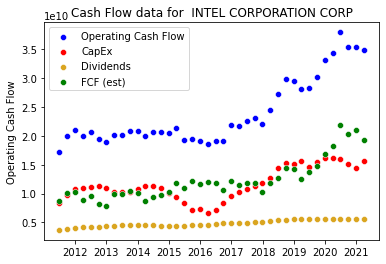

In [20]:
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y="Operating Cash Flow", color='blue')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=-cashflow_df["Capital expenditures"], color='red')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=-cashflow_df["Dividends Paid (Total)"], color='goldenrod')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=cashflow_df["Operating Cash Flow"]+cashflow_df["Capital expenditures"], color='green')
plt.legend(labels=['Operating Cash Flow','CapEx','Dividends','FCF (est)']);

# this code is optional, 
# it may bounce errors if the ticker isn't in stocks_list 
# try big familiar tickers like JNJ or INTC to calibrate 
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Cash Flow data for {ticker_name[5:]}');